In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_csv("canada_per_capita_income.csv")
df.head(3)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


In [28]:
df.columns=['year', 'per_capita_income']
df


,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


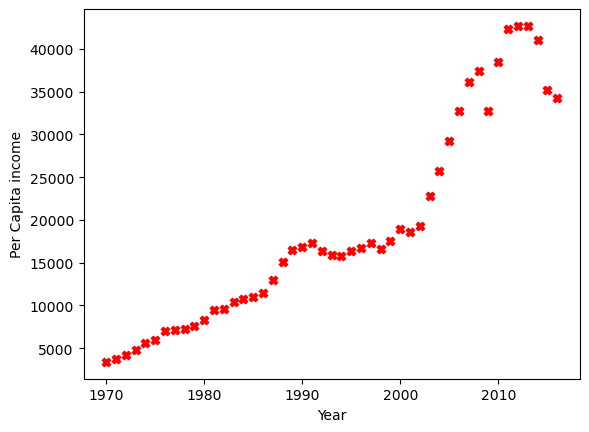

In [12]:
%matplotlib inline
plt.xlabel("Year")
plt.ylabel("Per Capita income")
plt.scatter(df.year,df.per_capita_income,color = 'red' , marker = "X")

In [31]:
new_df = df.drop('per_capita_income',axis = 'columns')
new_df.head(5)
#income = df.per_capita_income
#income.head(5)
#df.dtypes
#reg.fit(new_df,income)
reg.fit(df[["year"]],df.per_capita_income)

LinearRegression()

In [35]:
input_value = np.array([[1980]])
reg.predict(input_value)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8150.09108551])

In [36]:
reg.coef_

array([828.46507522])

In [39]:
reg.intercept_

-1632210.7578554575

In [41]:
828.46507522*1980+-1632210.7578554575

8150.091080142651

In [53]:
input_value = np.array([[2017],[2018],[2019],[2020],[2021],[2022],[2023]])
result = reg.predict(input_value)
df_predictive = pd.DataFrame({
    'year':input_value.flatten(),
    'per_capita_income':result
})
result

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38803.29886875, 39631.76394397, 40460.22901919, 41288.69409442,
       42117.15916964, 42945.62424486, 43774.08932009])

In [55]:
df = pd.concat([df , df_predictive] ,ignore_index = True)
df = df.drop("predictive_values" , axis= "columns")
df.tail()

,year,per_capita_income
63,2019,40460.229019
64,2020,41288.694094
65,2021,42117.159170
66,2022,42945.624245
67,2023,43774.089320


In [63]:
df = df.dropna(subset =['per_capita_income'])
df = df.drop_duplicates(subset = ["year"])

In [64]:
df.to_csv("canada_per_capita_income.csv" , index=False)